In [2]:
import os
import re
import string
from nltk.corpus import stopwords
from razdel import tokenize
import pymorphy2
import pandas as pd

In [3]:
morph = pymorphy2.MorphAnalyzer()

In [4]:
punct = string.punctuation + '\d«»–—'

In [5]:
stopwords_ru = stopwords.words('russian')

def make_tokens(text):
    tokens = []
    text = text.lower()
    text = text.translate(text.maketrans('','', punct))
    for token in tokenize(text):
        word = list(token)[-1]
        if word not in stopwords_ru:
            tokens.append(word)
    return tokens

def make_lemmas(text):
    tokens = make_tokens(text)
    for i in range(len(tokens)):
        tokens[i] = morph.parse(tokens[i])[0].normal_form
    return tokens

In [6]:
colnames = ["genre", "document", "lemmas"]

In [7]:
df = pd.DataFrame(columns=colnames)
genres = ['Эзотерика', 'Постмодернизм', 'Фанфик']
df.head()

,genre,document,lemmas


In [8]:
for genre in genres:
    os.chdir("C:\\Users\\quasar\\OneDrive\\Рабочий стол\\прога\\hw2\\" + genre)
    i = 0
    for document in os.listdir():
        if document.endswith('txt'):
            with open (document, "r", encoding="utf-8") as f:
                lemmas = make_lemmas(f.read())
            df = df.append({"genre": genre, "document": document, "lemmas": lemmas}, ignore_index=True)
            i += 1
            if i == 101:
                break

In [9]:
def list_to_str(some_list):
    return ' '.join(some_list)

In [10]:
df['text'] = df['lemmas'].apply(list_to_str)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [12]:
tfidf_vectorizer = TfidfVectorizer()

In [13]:
texts = df['text']

In [14]:
tfidf = tfidf_vectorizer.fit_transform(texts)

In [15]:
tfidf.shape

(303, 89977)

In [16]:
def pca_plot():
    pca = PCA(n_components=2).fit_transform(tfidf.todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(tfidf.todense()))

    principal_df = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])
    tsne_df = pd.DataFrame(data = tsne, columns = ['component 1', 'component 2'])
    
    pcа_final_df = pd.concat([principal_df, df[['genre']]], axis = 1)
    tsne_final_df = pd.concat([tsne_df, df[['genre']]], axis = 1)
    
    f, ax = plt.subplots(1, 2, figsize=(15, 7))

    ax[0].set_xlabel('Principal Component 1', fontsize = 12)
    ax[0].set_ylabel('Principal Component 2', fontsize = 12)
    ax[0].set_title("PCA", fontsize = 15)
    colors = ['r', 'g', 'b']
    for genre, color in zip(genres,colors):
        indicesToKeep = pcа_final_df['genre'] == genre
        ax[0].scatter(pcа_final_df.loc[indicesToKeep, 'principal component 1']
                   , pcа_final_df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 30)
    ax[0].legend(genres)
    ax[0].grid()
    
    ax[1].set_xlabel('Component 1', fontsize = 10)
    ax[1].set_ylabel('Component 2', fontsize = 10)
    ax[1].set_title("t-SNE", fontsize = 15)
    colors = ['r', 'g', 'b']
    for genre, color in zip(genres,colors):
        indicesToKeep = tsne_final_df['genre'] == genre
        ax[1].scatter(tsne_final_df.loc[indicesToKeep, 'component 1']
                   , tsne_final_df.loc[indicesToKeep, 'component 2']
                   , c = color
                   , s = 30)
    ax[1].legend(genres)
    ax[1].grid()

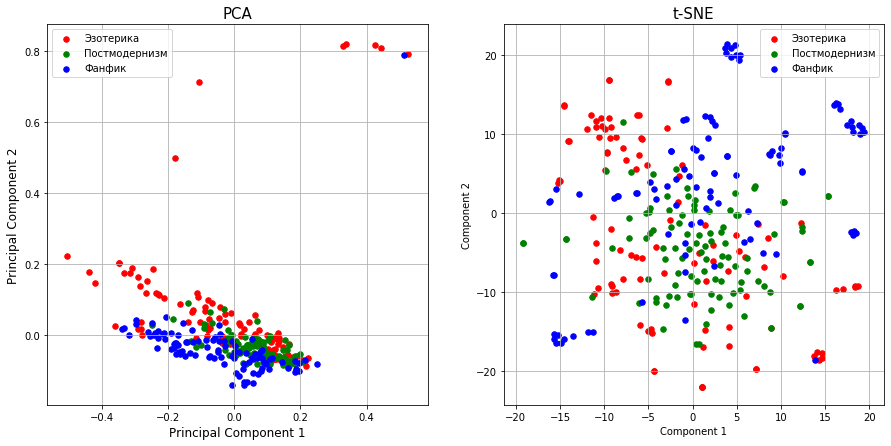

In [17]:
pca_plot()

Напишу ответ на вопросы здесь, а не в гугл форме, чтобы ничего не потерялось.
PCA всегда выстраивает результаты примерно вдоль одной линии. Это происходит потому, что он снижает размерность данных методом наименьших квадратов, и на основе "новых" значений данных выстраивается система координат, в которой осями служат наиболее важные компоненты для анализа.